# Domain Proyek

Diabetes merupakan penyakit kronis yang memengaruhi jutaan orang di seluruh dunia. Penyakit ini ditandai dengan tingginya kadar gula darah (glukosa) dalam tubuh. Kondisi ini terjadi karena tubuh tidak mampu memproduksi atau menggunakan hormon insulin secara efektif, sehingga glukosa tidak dapat digunakan sebagai sumber energi oleh sel-sel tubuh. Deteksi dini penyakit diabetes sangat penting untuk mencegah komplikasi yang lebih serius dan dapat dilakukan penanganan awal. Oleh karena itu, pengembangan model prediksi diabetes berbasis machine learning dapat membantu dalam diagnosis awal dan langkah yang diperlukan setelahnya.

Referensi:  
- [American Diabetes Association (2020). Classification and Diagnosis of Diabetes: Standards of Medical Care in Diabetes—2020.](https://doi.org/10.2337/dc20-S002)
- [D. Sisodia and D. S. Sisodia, “Prediction of Diabetes using Classification Algorithms,” Procedia Comput. Sci., vol. 132, pp. 1578–1585, 2018, doi: 10.1016/j.procs.2018.05.122.](https://doi.org/10.32520/stmsi.v10i1.1129)

# Business Understanding

## Problem Statements
- Bagaimana memprediksi apakah seseorang berisiko diabetes berdasarkan data medisnya?
- Bagaimana memanfaatkan model prediksi tersebut untuk membantu tenaga medis dalam pengambilan keputusan?

## Goals
- Membuat model klasifikasi yang dapat memprediksi risiko diabetes dengan akurasi tinggi.
- Membandingkan performa beberapa algoritma untuk menentukan model terbaik.

## Solution Statements
- Membangun baseline model menggunakan Logistic Regression dan Random Forest.
- Melakukan hyperparameter tuning pada model terbaik untuk meningkatkan performa.

# Data Understanding

#### Deskripsi Dataset

Dataset ini berisi data mengenai pasien yang memiliki atau berisiko mengalami diabetes. Setiap baris mewakili satu pasien, dan terdapat berbagai fitur medis yang diukur untuk setiap individu.

Dataset ini mencakup **768 entri** data dengan **12 kolom** fitur. Dataset ini memiliki label kelas yang mengindikasikan status diabetes pasien, yaitu **Non-diabetic (N)**, **Prediabetic (P)**, atau **Diabetic (Y)**.

#### Sumber Dataset
Dataset ini dapat ditemukan di [Kaggle - Diabetes Prediction Dataset](https://www.kaggle.com/datasets/marshalpatel3558/diabetes-prediction-dataset-legit-dataset/data?select=Dataset+of+Diabetes+.csv).

#### Variabel pada Dataset

1. **ID**: Identifikasi unik untuk setiap record pasien.
2. **No_Pation**: Nomor identifikasi pasien (mungkin ID rekam medis atau nomor pasien).
3. **Gender**: Jenis kelamin pasien:
   - `F`: Perempuan
   - `M`: Laki-laki
4. **AGE**: Usia pasien dalam tahun.
5. **Urea**: Tingkat urea dalam darah pasien (mg/dL atau mmol/L). Urea adalah produk sampingan metabolisme protein dan dapat memberikan indikasi fungsi ginjal.
6. **Cr**: Tingkat kreatinin dalam darah (mg/dL atau µmol/L). Kreatinin juga merupakan indikator fungsi ginjal.
7. **HbA1c**: Hemoglobin terglikasi, yang menunjukkan rata-rata kadar gula darah pasien selama 2-3 bulan terakhir (dalam bentuk persentase).
8. **Chol**: Kadar kolesterol total dalam darah (mg/dL atau mmol/L).
9. **TG**: Kadar trigliserida dalam darah (mg/dL atau mmol/L). Trigliserida adalah jenis lemak dalam darah.
10. **HDL**: Kadar kolesterol high-density lipoprotein (HDL), sering disebut sebagai kolesterol "baik" (mg/dL atau mmol/L).
11. **LDL**: Kadar kolesterol low-density lipoprotein (LDL), sering disebut sebagai kolesterol "jahat" (mg/dL atau mmol/L).
12. **VLDL**: Kadar kolesterol very low-density lipoprotein (VLDL), yang juga merupakan jenis kolesterol (mg/dL atau mmol/L).
13. **BMI**: Indeks massa tubuh (BMI), yang mengukur proporsi lemak tubuh berdasarkan tinggi badan dan berat badan (kg/m²).
14. **CLASS**: Label status diabetes dari pasien:
    - `N`: Non-diabetic
    - `P`: Prediabetic
    - `Y`: Diabetic

---

# Import Library and Data Load

In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler

from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV



ModuleNotFoundError: No module named 'ace_tools'

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df = pd.read_csv('/content/drive/MyDrive/Coding Camp - DBS Fundation/Machine Learning Terapan/Submission Pertama/Dataset of Diabetes .csv')
df.head()

,ID,No_Pation,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,CLASS
0,502,17975,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
1,735,34221,M,26,4.5,62,4.9,3.7,1.4,1.1,2.1,0.6,23.0,N
2,420,47975,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
3,680,87656,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
4,504,34223,M,33,7.1,46,4.9,4.9,1.0,0.8,2.0,0.4,21.0,N


# EDA (Exploratory Data Analysis)

In [4]:
df.shape

(1000, 14)

fungsi `df.shape` bertujuan untuk melihat jumlah row dan kolom pada sebuah DataFrame.Pada dataset tersebut memiliki total **1000** row dan **14** kolom

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID         1000 non-null   int64  
 1   No_Pation  1000 non-null   int64  
 2   Gender     1000 non-null   object 
 3   AGE        1000 non-null   int64  
 4   Urea       1000 non-null   float64
 5   Cr         1000 non-null   int64  
 6   HbA1c      1000 non-null   float64
 7   Chol       1000 non-null   float64
 8   TG         1000 non-null   float64
 9   HDL        1000 non-null   float64
 10  LDL        1000 non-null   float64
 11  VLDL       1000 non-null   float64
 12  BMI        1000 non-null   float64
 13  CLASS      1000 non-null   object 
dtypes: float64(8), int64(4), object(2)
memory usage: 109.5+ KB


`df.info()` memberikan informasi mengenai tipe data dan jumlah data yang hilang (missing values) untuk setiap kolom.

Pada dataset tersebut memiliki **13** tipe data berbentuk **float** dan **int**, lalu **1** tipe data berbentuk **object** yaitu 'class' yang mana ini merupakan **target** pada dataset ini.

Fungsi ini juga menunjukan bahwa pada dataset ini tidak memiliki **missing value** ditunjukkan pada *non-null*

In [6]:
df.describe()

,ID,No_Pation,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI
count,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,340.500000,2.705514e+05,53.528000,5.124743,68.943000,8.281160,4.862820,2.349610,1.204750,2.609790,1.854700,29.578020
std,240.397673,3.380758e+06,8.799241,2.935165,59.984747,2.534003,1.301738,1.401176,0.660414,1.115102,3.663599,4.962388
min,1.000000,1.230000e+02,20.000000,0.500000,6.000000,0.900000,0.000000,0.300000,0.200000,0.300000,0.100000,19.000000
25%,125.750000,2.406375e+04,51.000000,3.700000,48.000000,6.500000,4.000000,1.500000,0.900000,1.800000,0.700000,26.000000
50%,300.500000,3.439550e+04,55.000000,4.600000,60.000000,8.000000,4.800000,2.000000,1.100000,2.500000,0.900000,30.000000
75%,550.250000,4.538425e+04,59.000000,5.700000,73.000000,10.200000,5.600000,2.900000,1.300000,3.300000,1.500000,33.000000
max,800.000000,7.543566e+07,79.000000,38.900000,800.000000,16.000000,10.300000,13.800000,9.900000,9.900000,35.000000,47.750000


Fungsi `describe()` memberikan informasi statistik pada masing-masing kolom, antara lain:

- `Count`  adalah jumlah sampel pada data.
- `Mean` adalah nilai rata-rata.
- `Std` adalah standar deviasi.
- `Min` yaitu nilai minimum setiap kolom.
- `25%` adalah kuartil pertama. Kuartil adalah nilai yang menandai batas interval dalam empat bagian sebaran yang sama.
- `50%` adalah kuartil kedua, atau biasa juga disebut median (nilai tengah).
- `75%` adalah kuartil ketiga.
- `Max` adalah nilai maksimum.

dari fungsi `describe()` kita dapat mengetahui beberapa informasi :

- **AGE**: Usia pasien rata-rata 53.5 tahun, dengan variasi antara 20 hingga 79 tahun.
- **Urea** dan **Cr (Kreatinin)**: Kadar urea dan kreatinin menunjukkan rentang yang cukup besar, yang dapat memberikan indikasi mengenai fungsi ginjal pasien.
- **HbA1c**: Rata-rata kadar HbA1c sebesar 8.28% menunjukkan bahwa banyak pasien memiliki kadar gula darah lebih tinggi dari batas normal (6.5%).
- **Kolesterol (Chol, TG, HDL, LDL, VLDL)**: Kolesterol total, trigliserida, HDL, LDL, dan VLDL menunjukkan variasi yang cukup besar, yang dapat mempengaruhi kesehatan jantung.
- **BMI**: Rata-rata BMI adalah 29.58, yang menunjukkan bahwa sebagian besar pasien termasuk dalam kategori overweight atau obesitas.

## Menangani Missing Values

In [7]:
df.isnull().sum()

,0
ID,0
No_Pation,0
Gender,0
AGE,0
Urea,0
Cr,0
HbA1c,0
Chol,0
TG,0
HDL,0


`df.isnull().sum()` merupakan fungsi untuk mengetahui kolom kolom yang memiliki missing values , pada dataset tersebut **tidak** ditemukan data yang **kosong**

## Menangani Outliers


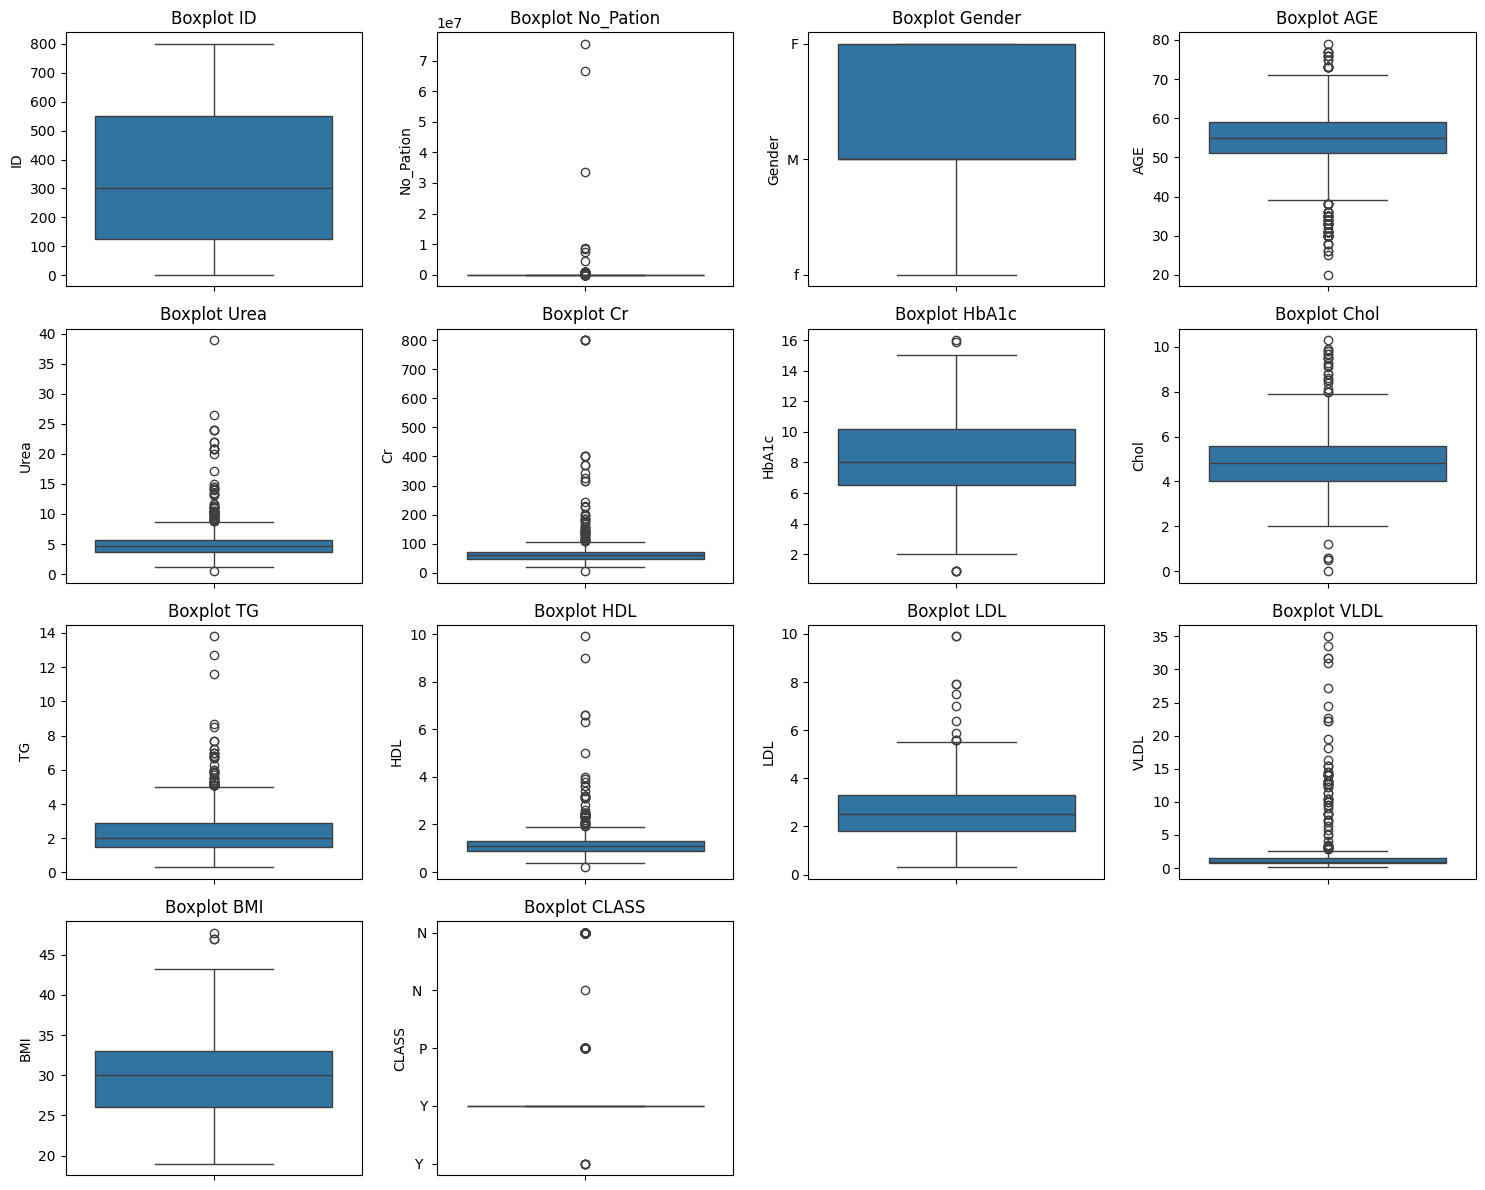

In [8]:
plt.figure(figsize=(15, 12))

n_cols = len(df.columns)
n_rows = (n_cols + 3) // 4

for i, column in enumerate(df.columns, 1):
    plt.subplot(n_rows, 4, i)
    sns.boxplot(df[column])
    plt.title(f'Boxplot {column}')

plt.tight_layout()
plt.show()



Boxplot yang ditampilkan menunjukkan beberapa fitur dalam dataset yang memiliki outliers yang terdeteksi. Outliers ini ditunjukkan dengan titik di luar whiskers pada setiap boxplot. Berikut adalah penjelasan mengenai fitur-fitur yang memiliki outliers:

1. **Boxplot Gender**:
   - Kolom **Gender** tidak menunjukkan adanya outliers karena hanya berisi dua kategori (`M` dan `F`).
   - Oleh karena itu, tidak ada distribusi yang perlu dianalisis lebih lanjut pada kolom ini.

2. **Boxplot Urea dan Boxplot Cr**:
   - **Urea** dan **Creatinine (Cr)** menunjukkan adanya nilai yang sangat tinggi yang berada di luar whiskers.
   - Nilai outliers pada kolom ini bisa mengindikasikan masalah pada fungsi ginjal, namun perlu dianalisis lebih lanjut apakah ini merupakan data yang sah atau kesalahan dalam pencatatan.

3. **Boxplot HbA1c**:
   - Kolom **HbA1c** menunjukkan adanya outliers dengan nilai yang sangat tinggi, yang menunjukkan bahwa beberapa pasien mungkin memiliki kadar gula darah yang sangat tidak terkontrol.
   - Pasien dengan nilai HbA1c tinggi mungkin menunjukkan kondisi diabetes yang buruk dan membutuhkan perhatian medis lebih lanjut.

4. **Boxplot Chol, TG, HDL, LDL, VLDL**:
   - Kolom **Cholesterol (Chol)**, **Triglycerides (TG)**, **HDL**, **LDL**, dan **VLDL** menunjukkan adanya outliers yang dapat dikaitkan dengan masalah kesehatan kardiovaskular.
   - Outliers pada kadar kolesterol dan trigliserida dapat menunjukkan pasien dengan risiko penyakit jantung atau gangguan metabolik, yang merupakan indikasi penting dalam diagnosis dan perawatan.

Kesimpulan:
- Outliers pada **AGE**, **Urea**, **Creatinine**, **HbA1c**, dan kolesterol menunjukkan adanya variasi yang signifikan dalam kondisi medis pasien.
- Beberapa nilai outliers mungkin merupakan data yang sah, misalnya pada pasien dengan gangguan ginjal atau diabetes yang tidak terkontrol.
- Pada dataset ini kita asumsikan bahwa data tersebut memang apa adanya karena dalam dunia medis sering ditemukan outliers pada beberapa fitur


In [9]:
numerical_cols = ['AGE', 'Urea', 'Cr', 'HbA1c', 'Chol', 'TG', 'HDL', 'LDL', 'VLDL', 'BMI']
categorical_cols = ['Gender', 'CLASS']

## Categorical Features

        jumlah sampel  persentase
Gender                           
M                 565        56.5
F                 434        43.4
f                   1         0.1


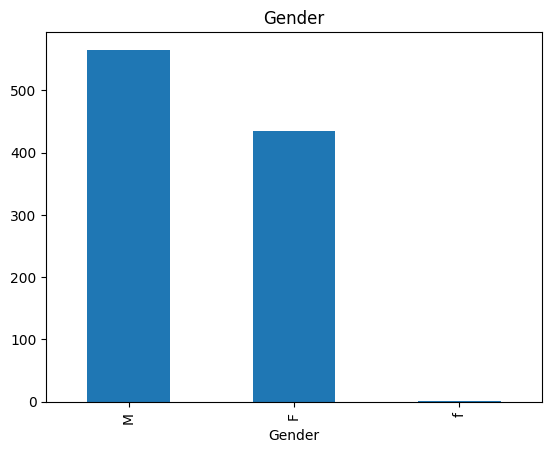

In [10]:
feature = categorical_cols[0]
count = df[feature].value_counts()
percent = 100*df[feature].value_counts(normalize=True)
categorical_df = pd.DataFrame({'jumlah sampel':count, 'persentase':percent.round(1)})
print(categorical_df)
count.plot(kind='bar', title=feature);

pada kolom `gender` menunjukkan perbandingan yang hampir seimbang yaitu untuk **Male** sebanyak **565** data dan untuk **Female** sebanyak **435**. Namun terdapat kesalahan penulisan pada salah satu data yaitu menggunakan huruf kecil pada `f` yang mana ini menunjukkan inkonsistensi. Maka perlu dirubah agar data menjadi konsisten

       jumlah sampel  persentase
CLASS                           
Y                840        84.0
N                102        10.2
P                 53         5.3
Y                  4         0.4
N                  1         0.1


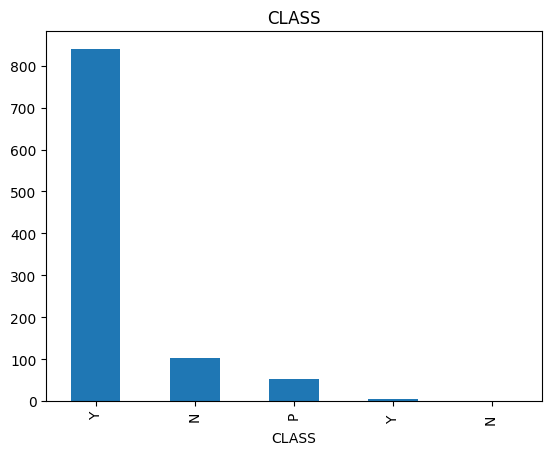

In [11]:
feature = categorical_cols[1]
count = df[feature].value_counts()
percent = 100*df[feature].value_counts(normalize=True)
categorical_df = pd.DataFrame({'jumlah sampel':count, 'persentase':percent.round(1)})
print(categorical_df)
count.plot(kind='bar', title=feature);

pada kolom `CLASS` menunjukkan perbandingan yang yang tidak seimbang / imbalance yaitu untuk **Y** sebanyak **844** data, untuk **N** sebanyak **103**,dan untuk **P** sebanyak **53**. Namun terdapat beberapa data yang terjadi kesalahan penulisan yaitu `Y`  dan `N` ,yang mana ini menunjukkan inkonsistensi. Maka perlu dirubah agar data menjadi konsisten

## Numerical Features


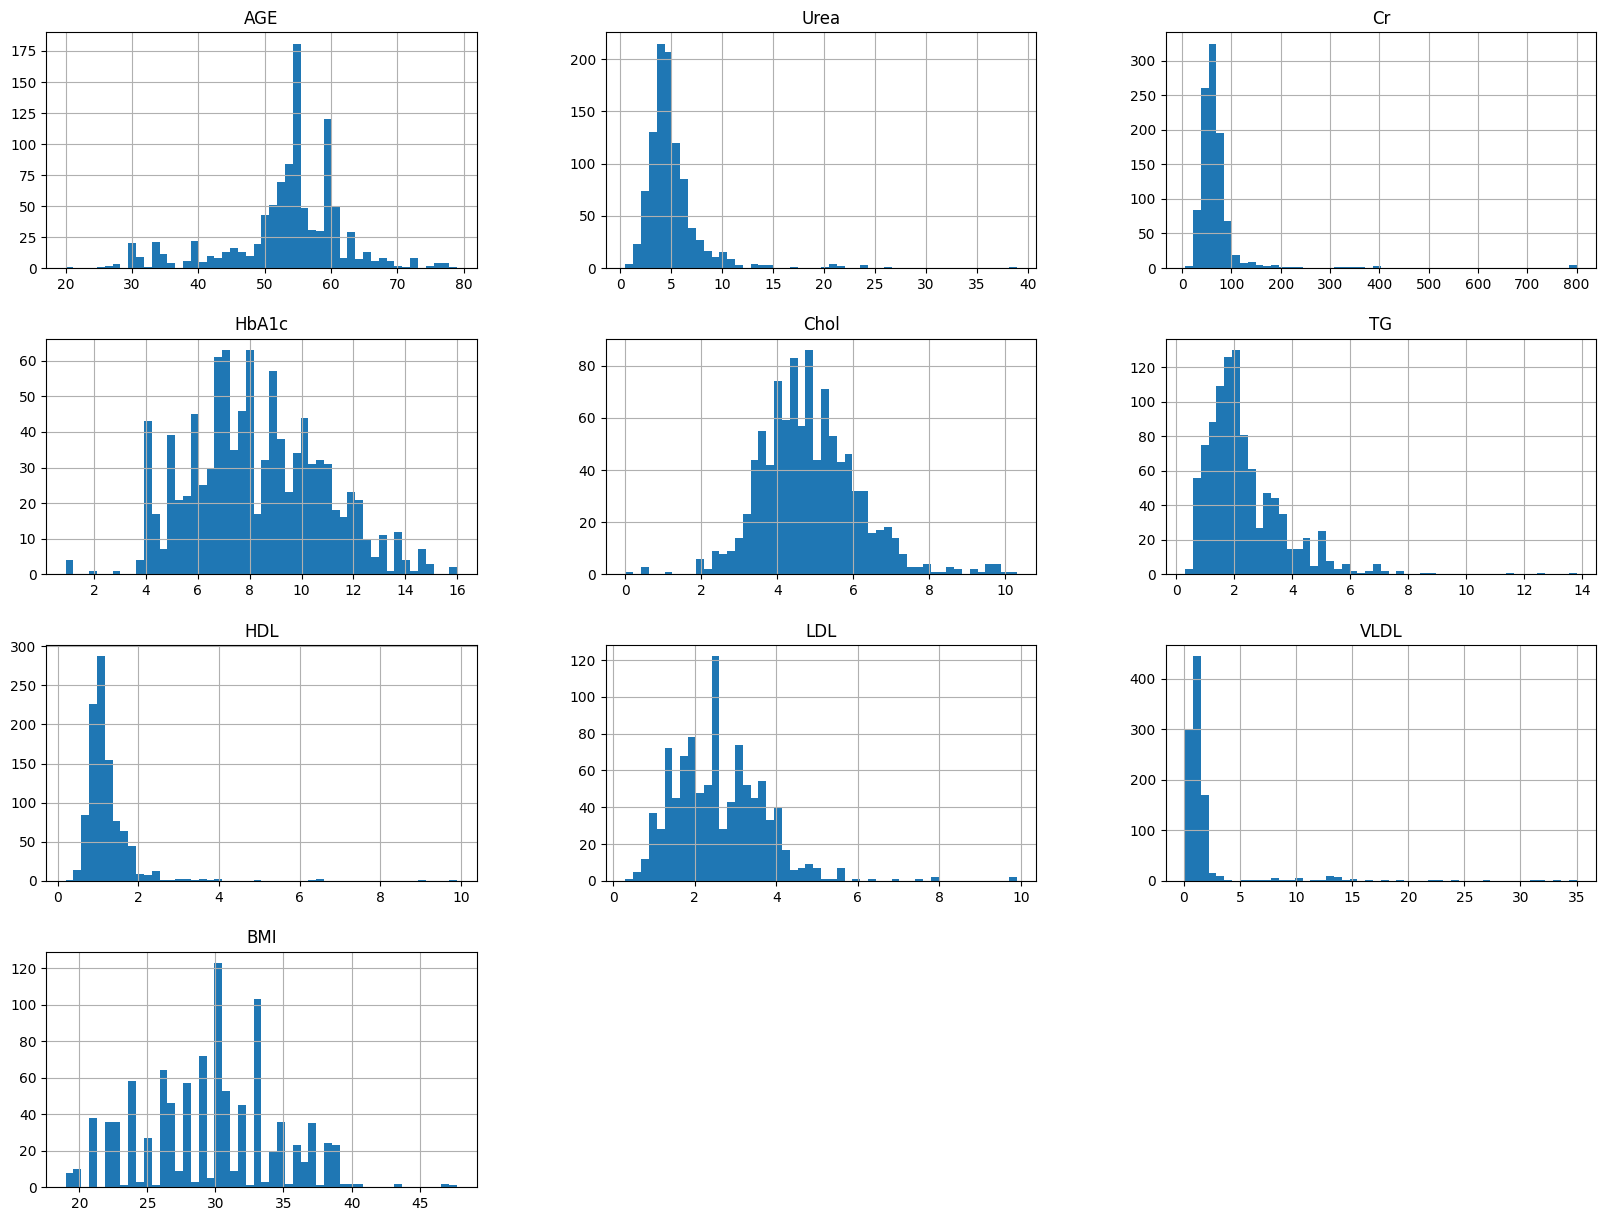

In [12]:
df[numerical_cols].hist(bins=50, figsize=(20,15))
plt.show()

 Penjelasan Distribusi Histogram untuk Fitur Numerik

1. **AGE**:
   - Distribusi **AGE** cenderung memiliki dua puncak, dengan konsentrasi utama pada usia sekitar 40-50 tahun. Ini menunjukkan bahwa sebagian besar pasien berada pada kelompok usia menengah.
   - Ada beberapa pasien di usia yang lebih tua, tetapi secara umum, distribusinya lebih terpusat pada rentang usia menengah.

2. **Urea**:
   - Distribusi **Urea** menunjukkan konsentrasi yang lebih tinggi pada nilai yang lebih rendah, dengan banyak pasien memiliki kadar urea di sekitar 5 mg/dL.
   - Ada beberapa outliers dengan nilai urea yang sangat tinggi, yang bisa menunjukkan gangguan fungsi ginjal.

3. **Cr (Kreatinin)**:
   - Distribusi **Cr** menunjukkan puncak yang sangat tinggi di sekitar 100, dengan sebagian besar data terkonsentrasi di bawah 200 mg/dL.
   - Ada beberapa pasien dengan kadar kreatinin sangat tinggi, yang menunjukkan adanya masalah pada fungsi ginjal.

4. **HbA1c**:
   - **HbA1c** memiliki distribusi yang miring ke kanan, dengan banyak pasien memiliki nilai di bawah 8%.
   - Ini menunjukkan bahwa sebagian besar pasien berada dalam rentang prediabetes atau diabetes yang tidak terkontrol dengan kadar HbA1c yang lebih tinggi.

5. **Chol (Kolesterol Total)**:
   - Distribusi **Chol** cenderung normal, dengan puncak di sekitar 4-6 mg/dL. Namun, ada beberapa outliers dengan kadar kolesterol yang sangat tinggi.
   - Ini menunjukkan adanya variasi yang cukup besar dalam kadar kolesterol darah pasien.

6. **TG (Trigliserida)**:
   - Distribusi **TG** memiliki puncak di sekitar 2-3 mg/dL, dengan beberapa pasien memiliki kadar trigliserida yang sangat tinggi (outliers).
   - Peningkatan kadar trigliserida dapat mengindikasikan risiko penyakit kardiovaskular.

7. **HDL (Kolesterol HDL)**:
   - Distribusi **HDL** menunjukkan konsentrasi di bawah 2, dengan beberapa pasien memiliki kadar HDL yang lebih tinggi.
   - HDL adalah kolesterol "baik," dan sebagian besar pasien tampaknya memiliki kadar yang lebih rendah dari yang diinginkan (idealnya di atas 2 mg/dL).

8. **LDL (Kolesterol LDL)**:
   - Distribusi **LDL** menunjukkan konsentrasi yang lebih tinggi pada nilai rendah (sekitar 2-3 mg/dL), dengan beberapa outliers yang menunjukkan kadar LDL sangat tinggi.
   - Ini menunjukkan adanya risiko yang lebih tinggi terkait dengan kolesterol "jahat" dalam darah.

9. **VLDL**:
   - Distribusi **VLDL** menunjukkan puncak di sekitar nilai yang sangat rendah, dengan beberapa outliers pada nilai tinggi.
   - VLDL adalah jenis kolesterol yang berbahaya, dan distribusinya menunjukkan sebagian besar pasien memiliki kadar yang lebih rendah.

10. **BMI**:
   - Distribusi **BMI** menunjukkan bahwa sebagian besar pasien memiliki BMI di sekitar 25-30, yang menunjukkan kelompok pasien dengan kategori overweight atau obesitas.
   - Ada banyak variasi pada BMI, dengan beberapa pasien memiliki BMI yang lebih tinggi dari nilai normal (30 ke atas).

 Kesimpulan:
- **AGE**, **Urea**, **Cr**, **HbA1c**, dan **Chol** menunjukkan variasi yang cukup besar di antara pasien. Beberapa fitur, seperti **Urea**, **Cr**, dan **HbA1c**, menunjukkan puncak yang kuat, yang bisa mengindikasikan kondisi medis yang lebih serius pada sebagian pasien.
- Kolesterol dan trigliserida (**Chol**, **TG**, **HDL**, **LDL**, **VLDL**) menunjukkan variasi yang normal, tetapi dengan beberapa nilai ekstrem yang mungkin mencerminkan risiko kardiovaskular pada beberapa pasien.
- **BMI** menunjukkan bahwa sebagian besar pasien berada dalam kategori overweight atau obesitas, yang merupakan faktor risiko untuk diabetes.


# Data Preprocessing

## Menangani data inkonsisten

In [13]:
df['Gender'].value_counts()

,count
Gender,
M,565
F,434
f,1


In [14]:
df['CLASS'].value_counts()

,count
CLASS,
Y,840
N,102
P,53
Y,4
N,1


In [15]:
print(df['CLASS'].unique())

['N' 'N ' 'P' 'Y' 'Y ']


dari fungsi `unique()` menunjukkan bahwa terdapat karakter ' ' (spasi) pada nilai 'N ' dan 'Y ' , nanti akan dihilangkan karakter tambahan (spasi)

In [16]:
df['Gender'] = df['Gender'].replace({'f': 'F'})
df['Gender'].value_counts()

,count
Gender,
M,565
F,435


fungsi `replace()` pada `df['Gender'].replace({'f': 'F'}` merubah karakter 'f' menjadi 'F' agar sesuai dengan nilai utama

In [17]:
df['CLASS'] = df['CLASS'].replace({'Y ': 'Y', 'N ': 'N'})
df['CLASS'].value_counts()

,count
CLASS,
Y,844
N,103
P,53


fungsi `replace()` pada `df['CLASS'].replace({'Y ': 'Y', 'N ': 'N'})` merubah karakter 'Y ' dan 'N ' menjadi 'Y' dan 'N' agar sesuai dengan nilai utama

## Encoding Categorical

In [18]:
le = LabelEncoder()
df['Gender'] = le.fit_transform(df['Gender'])
df['CLASS'] = le.fit_transform(df['CLASS'])

`LabelEncoder()` digunakan untuk merubah nilai kategorikal menjadi bentuk dari **0 sampai banyaknya data -1**, karena pada *Gender* memiliki 2 nilai yaitu F dan M , maka dirubah menjadi F = 0 , M = 1. Sedangkan pada *CLASS* memiliki 3 nilai yaitu Y, N, dan P maka dirubah menjadi N= 0, P= 1, Y= 2

In [19]:
df.head()

,ID,No_Pation,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,CLASS
0,502,17975,0,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,0
1,735,34221,1,26,4.5,62,4.9,3.7,1.4,1.1,2.1,0.6,23.0,0
2,420,47975,0,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,0
3,680,87656,0,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,0
4,504,34223,1,33,7.1,46,4.9,4.9,1.0,0.8,2.0,0.4,21.0,0


## Drop Columns

In [20]:
df.drop(['ID', 'No_Pation'], axis=1, inplace=True)
df.head()

,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,CLASS
0,0,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,0
1,1,26,4.5,62,4.9,3.7,1.4,1.1,2.1,0.6,23.0,0
2,0,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,0
3,0,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,0
4,1,33,7.1,46,4.9,4.9,1.0,0.8,2.0,0.4,21.0,0


pada kolom `ID` dan `No_Pation` kita drop karena kolom ini tidak digunakan dalam proses modelling nanti

## Korelasi antar Fitur

Text(0.5, 1.0, 'Correlation Matrix untuk Fitur Numerik ')

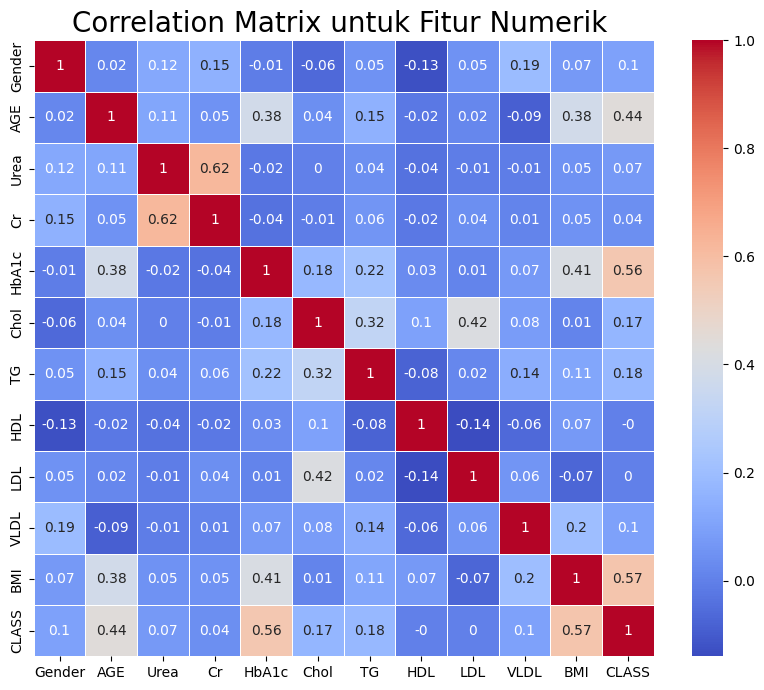

In [21]:
plt.figure(figsize=(10, 8))
correlation_matrix = df.corr().round(2)

# Untuk menge-print nilai di dalam kotak, gunakan parameter anot=True
sns.heatmap(data=correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, )
plt.title("Correlation Matrix untuk Fitur Numerik ", size=20)

Berdasarkan hasil **korelasi matrix** , fitur yang memiliki keterkaitan yang kuat dengan target `CLASS` yaitu `BMI`, `HbA1C`, dan `AGE` . sedangkan kolom `VLDL`, `TG`, `Chol`, dan `Gender` memiliki keterkaitan dengan target namun lemah.

## Train - Test Split

In [23]:
X = df.drop('CLASS', axis=1)
y = df['CLASS']

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [25]:
print(f'Total # of sample in whole dataset: {len(X)}')
print(f'Total # of sample in train dataset: {len(X_train)}')
print(f'Total # of sample in test dataset: {len(X_test)}')

Total # of sample in whole dataset: 1000
Total # of sample in train dataset: 800
Total # of sample in test dataset: 200


pada fungsi `train_test_split()` disini menerapkan **80:20** , yaitu dimana 80% digunakan sebagai data **train** dan 20% digunakan untuk data **test**

## SMOTE (Oversampling)

In [28]:
y_train.value_counts()

,count
CLASS,
2,671
0,82
1,47


In [30]:
smote = SMOTE(random_state=42)

X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

print(y_train_resampled.value_counts())

CLASS
0    671
2    671
1    671
Name: count, dtype: int64


`SMOTE(random_state=42)`: Fungsi SMOTE dengan nilai acak (random state) untuk memastikan hasil yang reproducible.

`smote.fit_resample(X_train, y_train)`: Fungsi ini melakukan oversampling pada X_train dan y_train dengan teknik SMOTE.

`y_train_resampled.value_counts()`: Menampilkan distribusi kelas setelah proses oversampling.

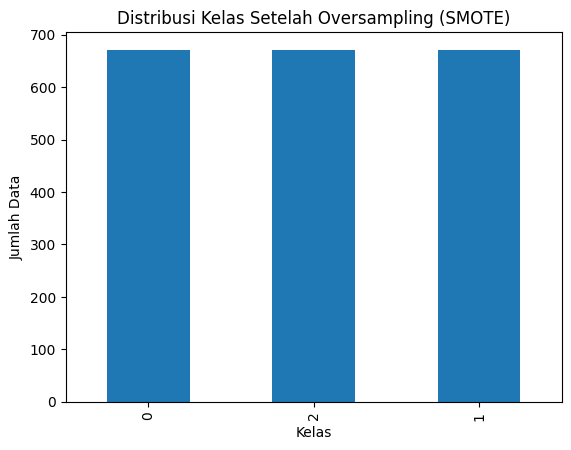

In [31]:
# Menampilkan distribusi kelas setelah oversampling
import matplotlib.pyplot as plt

y_train_resampled.value_counts().plot(kind='bar')
plt.title('Distribusi Kelas Setelah Oversampling (SMOTE)')
plt.xlabel('Kelas')
plt.ylabel('Jumlah Data')
plt.show()

Hasil dari `SMOTE` dapat dilihat yaitu sekarang target menunjukkan sudah balance dengan masing masing memiliki nilai **671**

## Standardisasi

In [36]:
scaler = StandardScaler()
X_train_resampled = scaler.fit_transform(X_train_resampled)
X_test = scaler.transform(X_test)

In [38]:
X_train_resampled

array([[-0.91837171, -0.4033155 , -0.18354872, ...,  1.14867292,
        -0.29344682, -0.82218369],
       [ 1.08888372,  0.5530807 , -0.93638808, ..., -1.07229047,
         0.31443704,  0.04293022],
       [ 1.08888372,  2.14707436, -0.84228316, ..., -0.85019413,
        -0.20660627,  1.55687956],
       ...,
       [ 1.08888372,  0.23428196,  0.1458185 , ..., -1.73857948,
        -0.38028737, -0.23357471],
       [-0.91837171, -1.14717921, -0.53859084, ...,  0.24732129,
        -0.12428345,  0.28446195],
       [-0.91837171,  0.12801572,  0.46803   , ...,  0.80426964,
        -0.22801542, -0.19527596]])

`StandardScaler` digunakan untuk menstandarisasi data agar fitur memiliki skala yang sama, dan ini diterapkan pada data latih yang sudah dioversampling dan data uji.


# Modelling

## Logistic Regression

In [45]:
model_lr = LogisticRegression(random_state=42)
model_lr.fit(X_train_resampled, y_train_resampled)

# Melakukan prediksi pada data uji
y_pred_lr = model_lr.predict(X_test)

# Menilai model menggunakan metrik yang sesuai (misalnya, akurasi, precision, recall)
from sklearn.metrics import accuracy_score
print("Accuracy:", accuracy_score(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_lr))

Accuracy: 0.9
              precision    recall  f1-score   support

           0       0.67      0.86      0.75        21
           1       0.27      0.67      0.38         6
           2       1.00      0.91      0.95       173

    accuracy                           0.90       200
   macro avg       0.64      0.81      0.70       200
weighted avg       0.94      0.90      0.92       200



pada model `Logistic Regression` hasil akurasi didapatkan mencapai **90%** dengan masing masing :

- pada **class** 0
  
  `presisi` : 67%

  `recall`  : 86%

  `f1-score` : 75%

- pada **class** 1
  
  `presisi` : 27%

  `recall`  : 67%

  `f1-score` : 38%

- pada **class** 2
  
  `presisi` : 100%

  `recall`  : 67%

  `f1-score` : 38%


Hasil ini menunjukkan bahwa model ini belum bisa mengenali pola secara merata khususnya untuk **class** bernilai 1 / Prediabetes


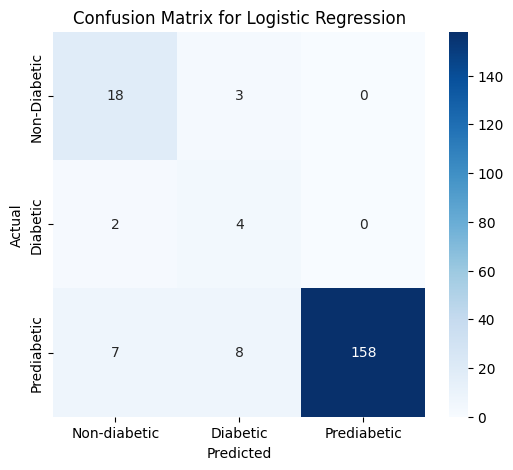

In [46]:
# Menampilkan Confusion Matrix
cm = confusion_matrix(y_test, y_pred_lr)

# Plotting Confusion Matrix
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-diabetic', 'Diabetic', 'Prediabetic'], yticklabels=['Non-Diabetic', 'Diabetic','Prediabetic'])
plt.title('Confusion Matrix for Logistic Regression')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

## Random Forest

In [39]:
model_rf = RandomForestClassifier(random_state=42)
model_rf.fit(X_train_resampled, y_train_resampled)

# Melakukan prediksi pada data uji
y_pred_rf = model_rf.predict(X_test)

# Menilai model menggunakan metrik yang sesuai (misalnya, akurasi, precision, recall)
from sklearn.metrics import accuracy_score
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

Accuracy: 0.985
              precision    recall  f1-score   support

           0       0.88      1.00      0.93        21
           1       1.00      1.00      1.00         6
           2       1.00      0.98      0.99       173

    accuracy                           0.98       200
   macro avg       0.96      0.99      0.97       200
weighted avg       0.99      0.98      0.99       200



pada model `Random Forest` hasil akurasi didapatkan mencapai **90%** dengan masing masing :

- pada **class** 0
  
  `presisi` : 88%

  `recall`  : 100%

  `f1-score` : 93%

- pada **class** 1
  
  `presisi` : 100%

  `recall`  : 100%

  `f1-score` : 100%

- pada **class** 2
  
  `presisi` : 100%

  `recall`  : 98%

  `f1-score` : 99%


Hasil ini menunjukkan bahwa model ini sudah cukup baik untuk mengenali pola dari masing-masing nilai pada target.

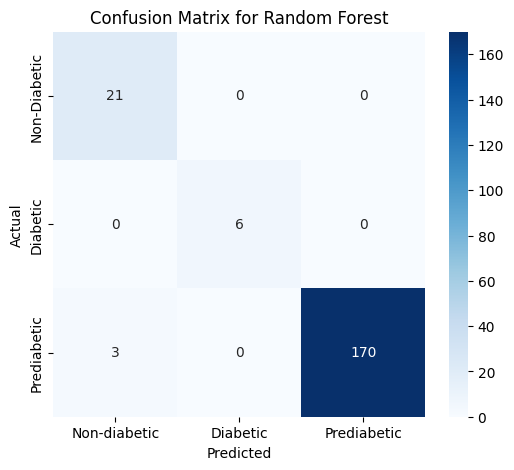

In [44]:
# Menampilkan Confusion Matrix
cm = confusion_matrix(y_test, y_pred_rf)

# Plotting Confusion Matrix
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-diabetic', 'Diabetic', 'Prediabetic'], yticklabels=['Non-Diabetic', 'Diabetic','Prediabetic'])
plt.title('Confusion Matrix for Random Forest')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Evaluasi Model

In [52]:
# Menghitung metrik evaluasi untuk kedua model
metrics = {
    'Model': ['Logistic Regression', 'Random Forest'],
    'Accuracy': [accuracy_score(y_test, y_pred_lr), accuracy_score(y_test, y_pred_rf)],
    'Precision': [precision_score(y_test, y_pred_lr, average='weighted'), precision_score(y_test, y_pred_rf, average='weighted')],
    'Recall': [recall_score(y_test, y_pred_lr, average='weighted'), recall_score(y_test, y_pred_rf, average='weighted')],
    'F1 Score': [f1_score(y_test, y_pred_lr, average='weighted'), f1_score(y_test, y_pred_rf, average='weighted')]
}

# Membuat DataFrame untuk membandingkan kedua model
df_comparison = pd.DataFrame(metrics)

df_comparison

,Model,Accuracy,Precision,Recall,F1 Score
0,Logistic Regression,0.900,0.943000,0.900,0.915979
1,Random Forest,0.985,0.986875,0.985,0.985434


perbandingan antara `Logistic Regression` dan `Random Forest` menunjukkan bahwa `Random Forest` lebih baik tingkat akurasinya yaitu sebesar **98 %**

In [57]:
data_baru = {
    'AGE': [45],          # Usia
    'Urea': [5.5],        # Kadar Urea dalam darah
    'Cr': [1.1],          # Kadar Kreatinin dalam darah
    'HbA1c': [7.5],       # Kadar HbA1c
    'Chol': [5.2],        # Kadar Kolesterol
    'TG': [2.3],          # Kadar Trigliserida
    'HDL': [1.1],         # Kadar HDL
    'LDL': [2.6],         # Kadar LDL
    'VLDL': [1.3],        # Kadar VLDL
    'BMI': [27.0],        # BMI
    'Gender': [0]         # Gender (0 untuk perempuan, 1 untuk laki-laki)
}
data_baru_df = pd.DataFrame(data_baru)


In [59]:
X_train_cols = X_train.columns
data_baru_df = data_baru_df[X_train_cols]

data_baru_standardisasi = scaler.transform(data_baru_df)

In [60]:
# Melakukan prediksi dengan model terbaik (Random Forest setelah tuning)
y_pred_baru = model_rf.predict(data_baru_standardisasi)

# Menampilkan hasil prediksi
if y_pred_baru == 0:
    print("Prediksi: Non-Diabetic")
elif y_pred_baru == 1:
    print("Prediksi: Diabetic")
else:
    print("Prediksi: Prediabetic")

Prediksi: Prediabetic
